# Sprint 3

In [5]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from fastai.vision.all import PILImage

Loading dataset

In [6]:
# (X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# X_train_full = X_train_full.astype(np.float32) / 255
# X_test = X_test.astype(np.float32) / 255
# X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
# y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

IMG_HEIGHT = 128
IMG_WIDTH = 128
img_folder = "tripadvisor_dataset/tripadvisor_mini"

def create_dataset(img_folder, n=None):
    # n = amount of images
    image_files=os.listdir(os.path.join(img_folder))
    if n==None:
        n=len(image_files)
    images = np.zeros((n, IMG_HEIGHT, IMG_WIDTH, 3))
    for i,file in enumerate(image_files[:n]):
        # print(f"{i},{file}")
        
        img=PILImage.create(os.path.join(img_folder,file))
        img_resized=img.resize((IMG_HEIGHT,IMG_WIDTH))
        img_np = np.array(img_resized) #.reshape((IMG_HEIGHT,IMG_WIDTH, 3)) #.astype(np.float32)
        images[i]=img_np/255
    return images

images = create_dataset(img_folder)
images_length = len(images)
X_train_full = images
X_train_full.shape

(6, 128, 128, 3)

In [22]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))


conv_encoder = keras.models.Sequential([
    # keras.layers.Reshape([128, 128, 3], input_shape=[128, 128, 3]),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3, padding="SAME", activation="selu"), 
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="SAME", activation="selu", input_shape=[16, 16, 128]),
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(3, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])


conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train_full, X_train_full, epochs=10)

# print(conv_encoder.summary())
conv_decoder.summary()




Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6944 - rounded_accuracy: 0.4996
Epoch 2/10
1/1 [==============================] - 0s 164ms/step - loss: 0.6890 - rounded_accuracy: 0.6063
Epoch 3/10
1/1 [==============================] - 0s 191ms/step - loss: 0.6850 - rounded_accuracy: 0.6415
Epoch 4/10
1/1 [==============================] - 0s 168ms/step - loss: 0.6819 - rounded_accuracy: 0.6507
Epoch 5/10
1/1 [==============================] - 0s 165ms/step - loss: 0.6795 - rounded_accuracy: 0.6545
Epoch 6/10
1/1 [==============================] - 0s 168ms/step - loss: 0.6775 - rounded_accuracy: 0.6570
Epoch 7/10
1/1 [==============================] - 0s 175ms/step - loss: 0.6759 - rounded_accuracy: 0.6590
Epoch 8/10
1/1 [==============================] - 0s 192ms/step - loss: 0.6746 - rounded_accuracy: 0.6612
Epoch 9/10
1/1 [==============================] - 0s 172ms/step - loss: 0.6735 - rounded_accuracy: 0.6634
Epoch 10/10
1/1 [==============================] 

1/1 [==============================] - 0s 236ms/step


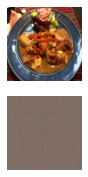

In [23]:
import matplotlib.pyplot as plt


def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


def show_reconstructions(model, images=X_train_full, n_images=1):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])


show_reconstructions(conv_ae)

plt.show()


1/1 [==============================] - 0s 47ms/step
[[[125 121 112]
  [126 118 112]
  [125 118 113]
  ...
  [124 116 113]
  [127 116 109]
  [126 117 113]]

 [[126 116 112]
  [124 119 108]
  [127 114 109]
  ...
  [123 119 108]
  [127 114 109]
  [124 120 112]]

 [[126 119 111]
  [123 118 109]
  [127 116 106]
  ...
  [125 115 115]
  [126 111 101]
  [124 115 110]]

 ...

 [[125 116 112]
  [124 117 112]
  [128 117 111]
  ...
  [121 117 111]
  [127 114 107]
  [123 119 112]]

 [[123 117 109]
  [125 117 110]
  [127 113 105]
  ...
  [124 115 111]
  [131 112 103]
  [124 114 111]]

 [[125 118 112]
  [124 120 112]
  [126 115 110]
  ...
  [123 119 112]
  [128 112 109]
  [124 118 112]]]


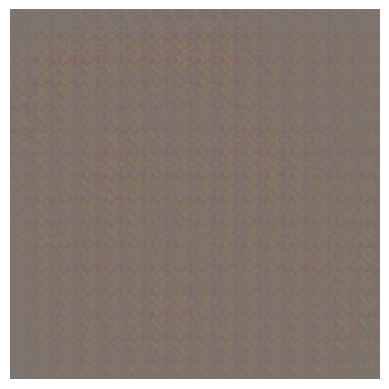

In [20]:
reconstructions = conv_ae.predict(X_train_full[:1])
reconstruction_casted = (reconstructions[0]*255).astype(np.uint8)
print(reconstruction_casted)
# plt.imshow(reconstruction_casted)
plot_image(reconstruction_casted)



In [6]:
X_train_full[:1].shape

(1, 128, 128, 3)